In [1]:
%matplotlib inline
from pyqcd.alphabet import Alphabet
from pyqcd.algorithms import *
from pyqcd.matrices import QFT
from pyqcd.gates import I, U3, CX
from pyqcd.logger import Logger
from pyqcd.math_utils import d2

from time import time

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from qiskit.visualization.state_visualization import plot_state_hinton

def show_matrix(matrix: np.array, binary: bool = False, title: str = ""):
    fig, (ax1,ax2) = plt.subplots(ncols=2)
    ax1.matshow(np.real(matrix))
    ax2.matshow(np.imag(matrix))
    
    fig.suptitle(title)
    if binary:
        Q = matrix.shape[0]
        ticks = np.arange(Q)
        labels = [np.binary_repr(x, width=int(np.log2(Q))) for x in ticks]
        
        ax1.set_xticks(ticks)
        ax2.set_xticks(ticks)

        ax1.set_yticks(ticks)
        ax2.set_yticks(ticks)
        
        ax1.set_xticklabels(labels, rotation=45)
        ax2.set_xticklabels(labels, rotation=45)

        ax1.set_yticklabels(labels)
        ax2.set_yticklabels(labels)
        
        return fig



def main():
    # Quantum Fourier Transform on 4 qubits
    target = QFT(Q=5)

    # Instantiate a custom set of gates, an alphabet whose words are gates
    alphabet = Alphabet(Q=5)
    alphabet.register_gates([I, U3, CX])

    # Instantiate the search class
    solver = GLOA(target=target, alphabet=alphabet, n_groups=25, group_size=10, circuit_size=30)

    # Instantiate the logger class to keep track of fitness evolution
    logger = Logger("data/%s_%s_QFT2.pickle" % (int(time()), solver.__class__.__name__), True)
    logger.add_variables(*solver.stats().keys())

    f = show_matrix(target, title="target")

    # Main loop
    while solver.best is None or solver.best.score > 0.1:
        # One step evolution
        solver.evolve()

        # Gather and save statistics
        logger.register(**solver.stats())
        
        f = show_matrix(solver.best.to_matrix(), title="best")
        plt.show()

In [2]:
target = QFT(2)

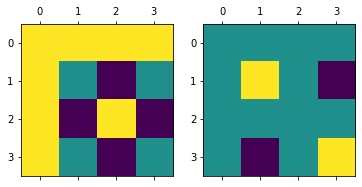

In [4]:
show_matrix(target)

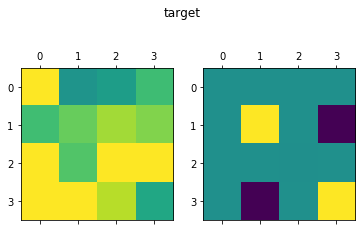

KeyboardInterrupt: 

In [21]:
matrix = target

fig, (ax1,ax2) = plt.subplots(ncols=2)
im1 = ax1.matshow(np.real(matrix))
im2 = ax2.matshow(np.imag(matrix))
fig.suptitle("target")
while True:
    im1.set_data(np.random.random((4,4)))
    plt.show()

In [25]:
ax = fig.axes[0]

In [10]:
im1 = ax1.matshow(np.real(matrix))

In [13]:
im1.set_data(np.random.random((4,4)))

In [27]:
ax.images[0].s

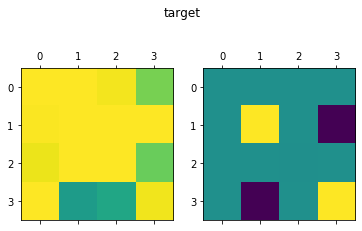

In [28]:
fig

In [29]:
fig.draw

<bound method Figure.draw of <Figure size 432x288 with 2 Axes>>

In [32]:
?fig.canvas.draw